### Exploratory Data Analysis

In [0]:
import pandas as pd

In [0]:
data=pd.read_excel("./zomato_train.xlsx")

In [0]:
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [0]:
#Checking null values
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [0]:
data.shape

(41373, 17)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [0]:
data.online_order.value_counts()

Yes    24330
No     17043
Name: online_order, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


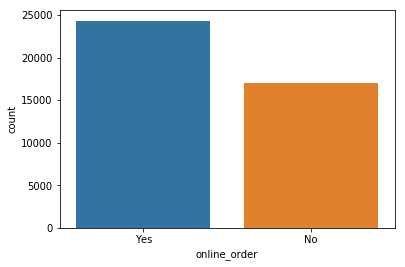

In [0]:
import seaborn as sns
print(sns.countplot(x=data['online_order']))

In [0]:
data.book_table.value_counts()

No     36231
Yes     5142
Name: book_table, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


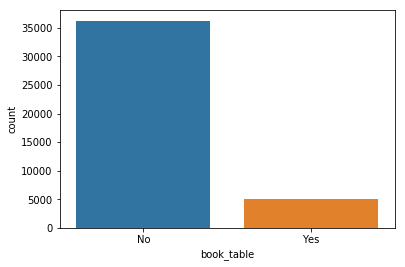

In [0]:
print(sns.countplot(x=data['book_table']))

In [0]:
data["listed_in(type)"].value_counts()

Delivery              20778
Dine-out              14224
Desserts               2838
Cafes                  1387
Drinks & nightlife      885
Buffet                  699
Pubs and bars           562
Name: listed_in(type), dtype: int64

[Text(0, 0, 'Delivery'), Text(0, 0, 'Dine-out'), Text(0, 0, 'Drinks & nightlife'), Text(0, 0, 'Desserts'), Text(0, 0, 'Cafes'), Text(0, 0, 'Pubs and bars'), Text(0, 0, 'Buffet')]


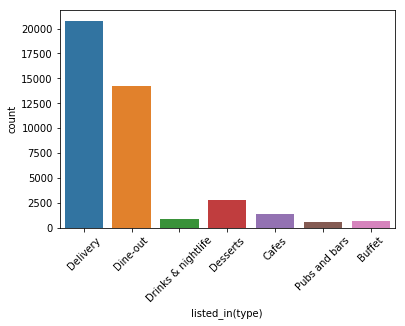

In [0]:
#data.rates.nunique()
chart=sns.countplot(x=data['listed_in(type)'])
print(chart.set_xticklabels(chart.get_xticklabels(), rotation=45))

## Data Cleaning and Preprocessing

In [0]:
#Converting cost to float
data=data.rename(columns={"approx_cost(for two people)":"cost" })
data['cost'] = data['cost'].str.replace(',','').astype(float)

In [0]:
#Converting votes to numeric
data["votes"] = data["votes"].apply(pd.to_numeric)

In [0]:
#Removing noise from rates and convert to float
data = data.loc[data.rates !='-'].reset_index(drop=True)
data["rates"] = data["rates"].astype('float')

In [0]:
#Filling null values in rates
data["rates"]=data['rates'].fillna(data['rates'].mean())

In [0]:
#Filling null values in cost
data["cost"]=data['cost'].fillna(data['cost'].mean())

In [0]:
#Converting online_order and book_table column to Boolean type
data.online_order.replace(('Yes','No'),(True, False),inplace=True)
data.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [0]:
#Encoding categorical variable using factorize method
for column in data.columns[~data.columns.isin(['rates', 'cost', 'votes'])]:
    data[column] = data[column].factorize()[0]

In [0]:
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,0,0,0,0,0,13,0,0,0,-1,0,0,0,0,0,0,3.1
1,1,1,1,1,1,5015,1,1,1,0,1,1,1,1,1,1,4.6
2,2,2,2,1,0,6,2,2,0,-1,2,2,2,1,1,2,3.4
3,3,3,3,1,0,699,3,3,2,1,3,3,3,1,1,0,4.3
4,4,4,4,0,0,129,4,4,3,-1,4,4,4,2,0,1,3.7


In [0]:
#Selecting important features
data=data[["online_order","book_table","votes",
         "rest_type","cost","rates"]]

In [0]:
data.isnull().sum()

online_order    0
book_table      0
votes           0
rest_type       0
cost            0
rates           0
dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41317 entries, 0 to 41316
Data columns (total 6 columns):
online_order    41317 non-null int64
book_table      41317 non-null int64
votes           41317 non-null int64
rest_type       41317 non-null int64
cost            41317 non-null float64
rates           41317 non-null float64
dtypes: float64(2), int64(4)
memory usage: 1.9 MB


## Defining dependent and independent variables of model


In [0]:
y = data['rates'].values   #dependent
X = data.drop('rates', axis=1).values   #independent

In [0]:
#Spliting data in testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [0]:
#Fitting regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.26163448091363395

In [0]:
#Fitting Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)
print(RForest.score(X_test, y_test))

0.7629955266499993


In [0]:
#Fitting ensemble model to improve accuracy
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)
print(ETree.score(X_test, y_test))

0.7742436118135421
